## Importing the Libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
import sklearn.preprocessing as prepro 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.compose import ColumnTransformer

## Loading the Dataset

In [66]:
df = pd.read_csv(r"C:\Users\Shashikanth\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [67]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Exploratory Data Analysis

### Converting the columns to lower case

In [11]:
df.columns = map(str.lower, df.columns)

In [12]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [13]:
def Data_transformation_renaming(df):
    """ Transformed into proper format and return dataframe """
    df_cal = df.copy()
    
    df_cal['partner'] = df_cal.partner.map({'Yes':1,'No':0})
    df_cal['dependents'] = df_cal.dependents.map({'Yes':1,'No':0})

    df_cal['phoneservice'] = df_cal.phoneservice.map({'Yes':1,'No':0})
    df_cal['multiplelines'] = df_cal.multiplelines.map({'Yes':1,'No':0,'No phone service':0})

    df_cal['internetservice'] = df_cal.internetservice.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['onlinesecurity'] = df_cal.onlinesecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['onlinebackup'] = df_cal.onlinebackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['deviceprotection'] = df_cal.deviceprotection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['techsupport'] = df_cal.techsupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['streamingtv'] = df_cal.streamingtv.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['streamingmovies'] = df_cal.streamingmovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['paperlessbilling'] = df_cal.paperlessbilling.map({'Yes':1,'No':0})
    df_cal['churn'] = df_cal.churn.map({'Yes':1,'No':0})
     
    # Data mining
    df_cal['iscontracted'] = df_cal.contract.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    # Data transformation
    
    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['totalcharges']==' ','totalcharges'] = np.nan
    
    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['totalcharges'] = df_cal['totalcharges'].astype('float64')
    df_cal.loc[df_cal['totalcharges'].isnull()==True,'totalcharges'] = df_cal['monthlycharges'] * df_cal['tenure']
    

    return df_cal

In [14]:
df_cal = Data_transformation_renaming(df)

df_cal.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,iscontracted
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0


In [15]:
cat_cols = ["gender","partner","dependents","seniorcitizen","phoneservice","multiplelines"
            ,"internetservice","onlinesecurity","onlinebackup","deviceprotection"
            ,"techsupport","streamingtv","streamingmovies","iscontracted"
            ,"contract","paperlessbilling","paymentmethod"]


num_cols = ["tenure","monthlycharges","totalcharges"]

target_col = 'churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['gender','internetservice','paymentmethod','contract']

binary_cols = ['seniorcitizen','partner','dependents','phoneservice','multiplelines','onlinesecurity'
               ,'onlinebackup' ,'deviceprotection','techsupport','streamingtv', 'streamingmovies'
               ,'paperlessbilling','internetservice', 'iscontracted']

### Descriptive statistics

In [16]:
df_cal[cat_cols].describe(include='all')

,gender,partner,dependents,seniorcitizen,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,iscontracted,contract,paperlessbilling,paymentmethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365
mean,NaN,0.483033,0.299588,0.162147,0.903166,0.421837,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,NaN,0.592219,NaN
std,NaN,0.499748,0.458110,0.368612,0.295752,0.493888,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,NaN,0.491457,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN


In [17]:
df_cal[num_cols].describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


* Based on numerical columns descriptive analysis, average tenure, average monthly charges and total charges of subscriber is 32 months, 64 dollars and 2282 dollars, respectively.

In [18]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

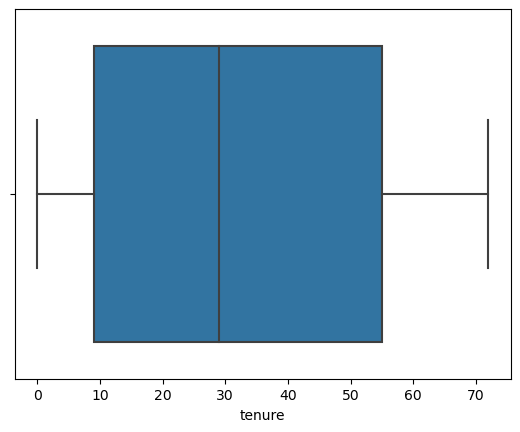

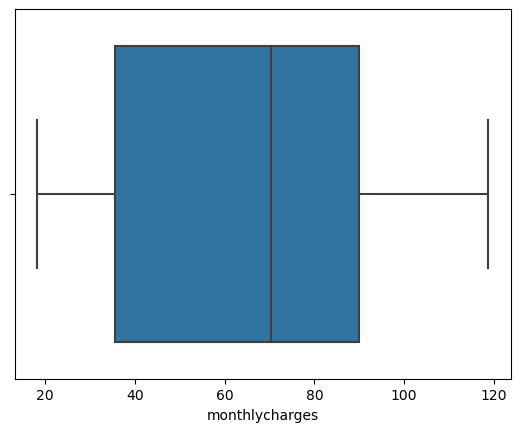

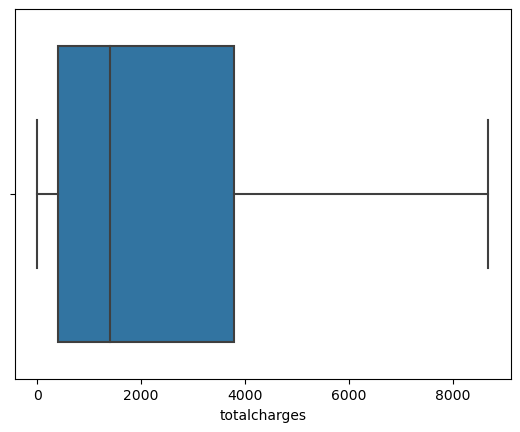

In [19]:
for i in num_cols:
    Outlier_boxplot(df_cal,i)

Box plot graphs shows that none of the numerical columns have outliers.

In [20]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title, color=None):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x)),
           y,
           width=0.75,
           color=color if color else 'blue',  # Using the provided color or defaulting to blue if color is not provided
           alpha=0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)), x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title, fontsize=13)
    plt.ylabel(y_title, fontsize=13)
    plt.grid(color = 'blue')  # Fixing the typo here
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    # Visible x-axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i, v in enumerate(y):
        ax.text(i, v + 0.05, str(round((v * 100), 2)) + '%', fontsize=13, ha='center')
    
    plt.show()


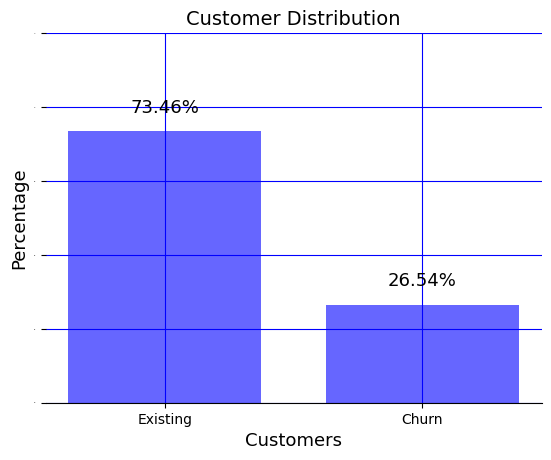

0    0.73463
1    0.26537
Name: churn, dtype: float64


In [21]:
Churn_rate = df_cal['churn'].value_counts() / df_cal.shape[0]
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)

**Churn rate of telecom company** is around 26%, Meaning around 26% of the subscribers left the company during given interval.

## Correlation 

In [22]:
df_cal.corr()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,iscontracted
seniorcitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.182742,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,0.150889,-0.138360
partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000615,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,-0.150448,0.280865
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.139812,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.062078,-0.164221,0.231720
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.039062,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,-0.352229,0.645561
phoneservice,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.172209,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,0.011942,0.000742
multiplelines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.210564,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468504,0.040102,0.088203
internetservice,0.182742,-0.000615,-0.139812,0.039062,-0.172209,0.210564,1.000000,0.333403,0.381593,0.380754,0.336298,0.415552,0.418675,0.321013,0.763557,0.375223,0.227890,-0.218639
onlinesecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.333403,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.411651,-0.171226,0.246679
onlinebackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.381593,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509226,-0.082255,0.164172
deviceprotection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.380754,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.521983,-0.066160,0.225662


In [23]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

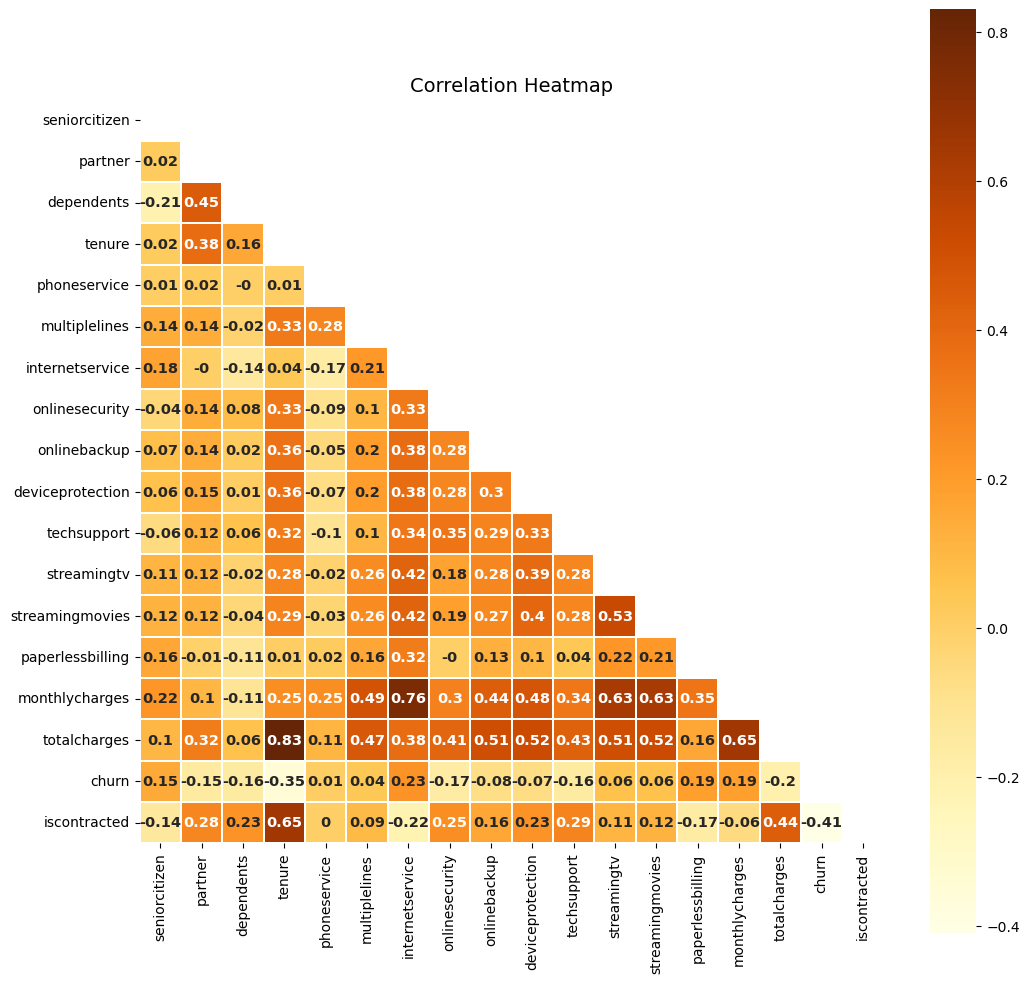

In [24]:
var_corr = round(df_cal.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

From correlation matrix, features like **Tenure, Monthly charges and Total charges** are **highly correlated with services** like MultipleLines of phone services and Internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and Streaming Movies services.

### Distribution of features as per Churn

#### Distribution of categorical and binary variables

In [25]:
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_churn_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col=distribution_col
                , kind='bar'
                , aspect = 0.8
                , alpha = 0.6)
        
        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 90, horizontalalignment = 'right')
        
        
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()



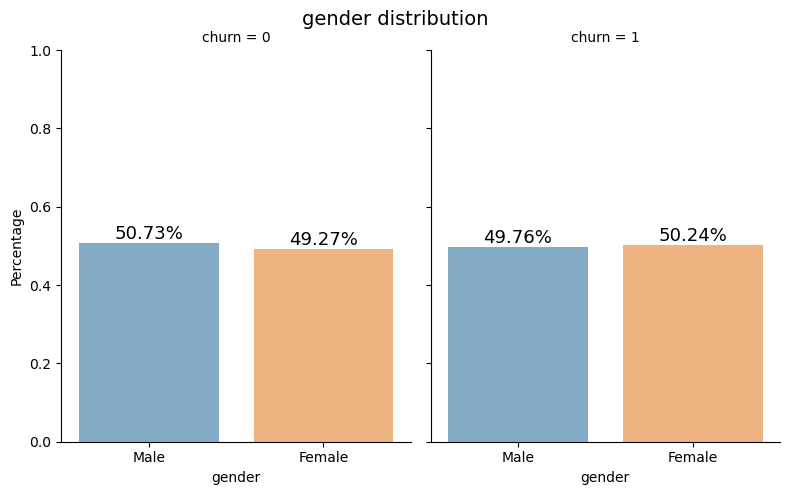

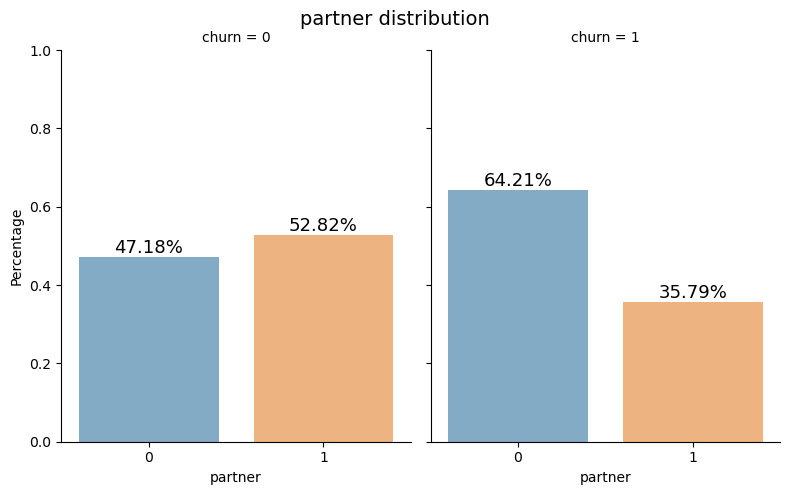

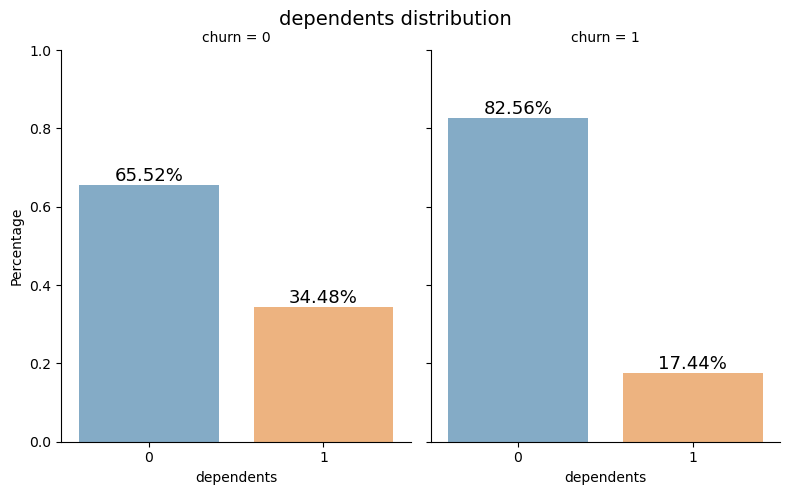

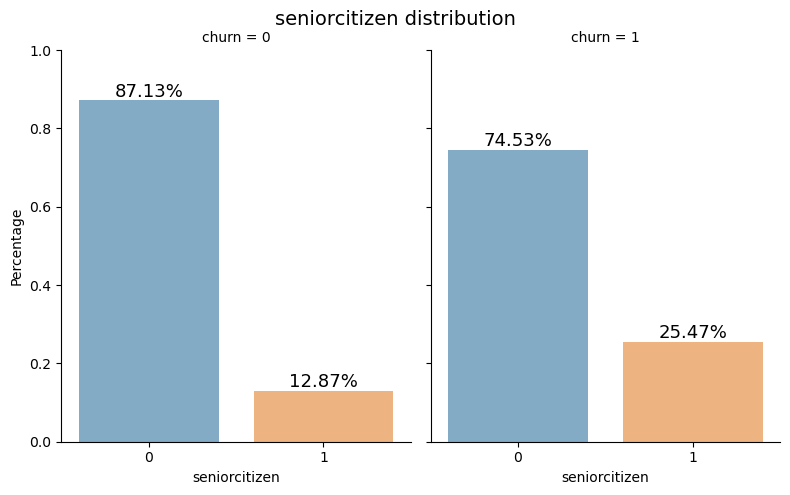

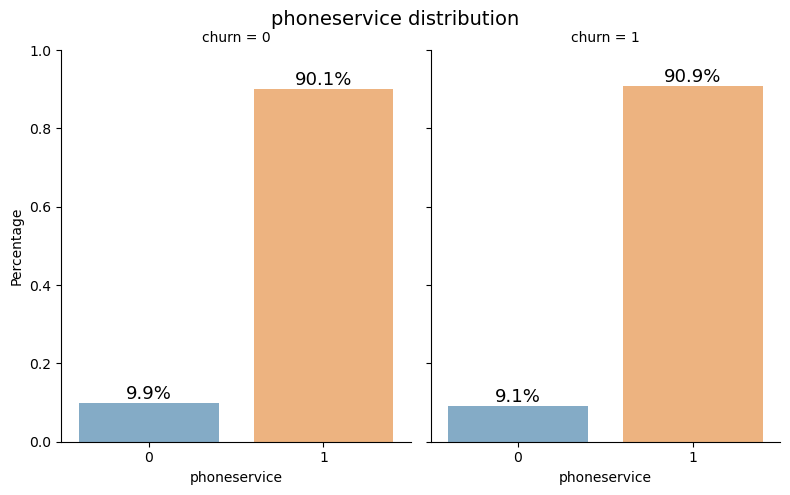

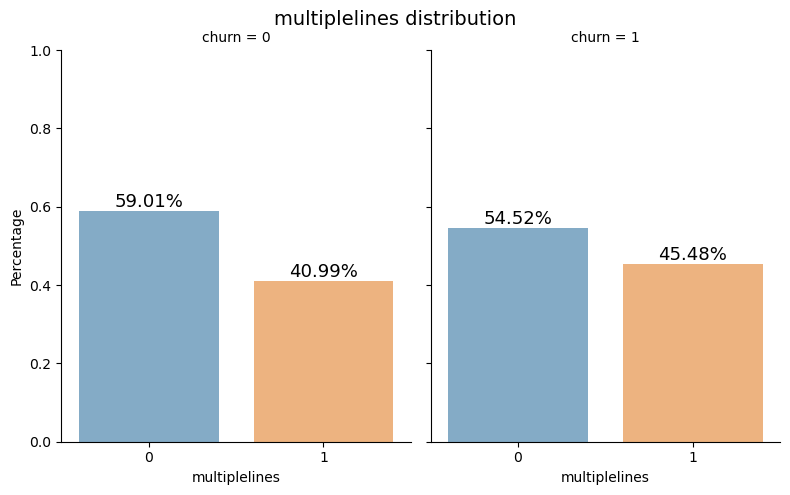

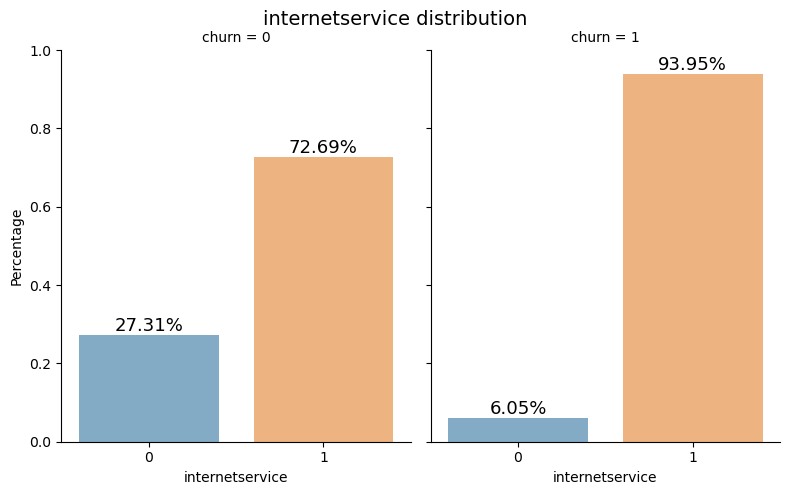

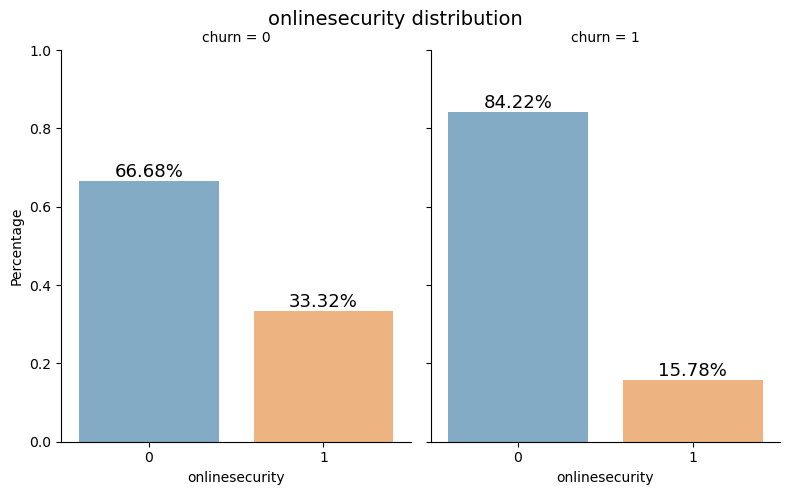

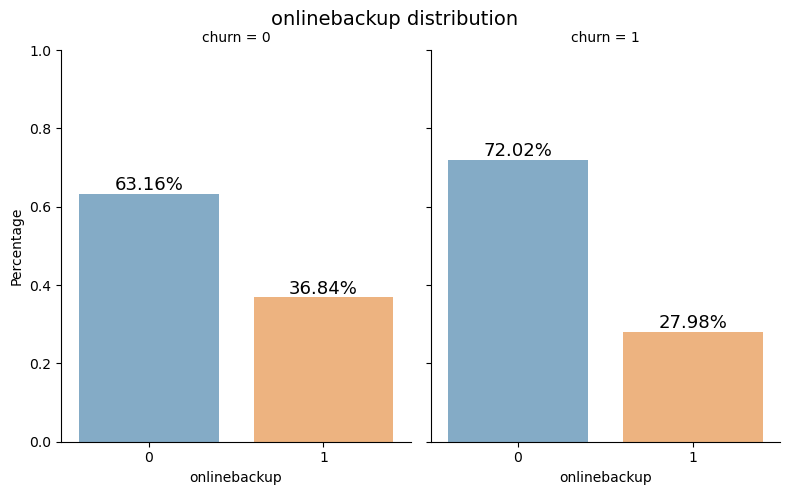

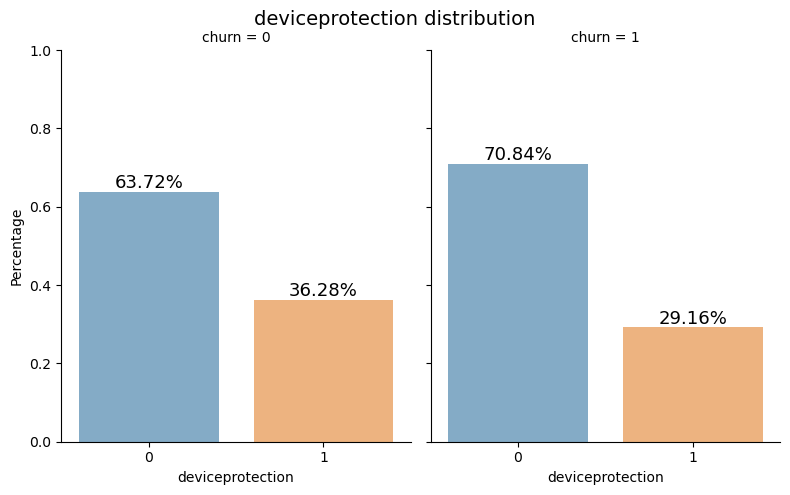

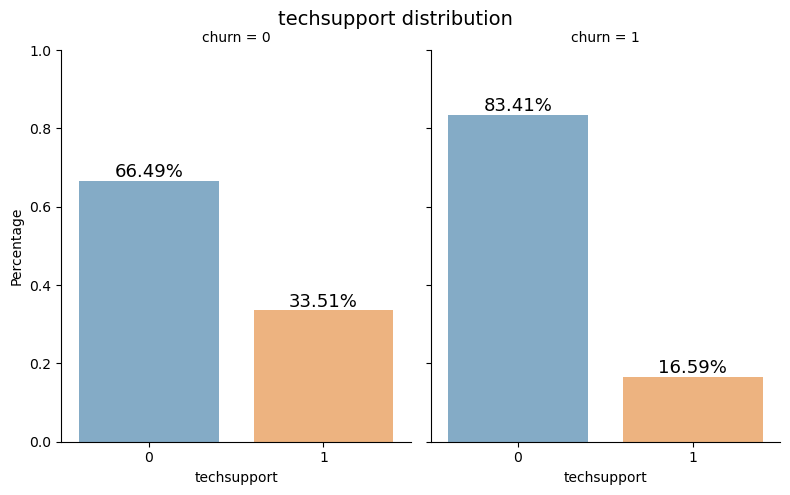

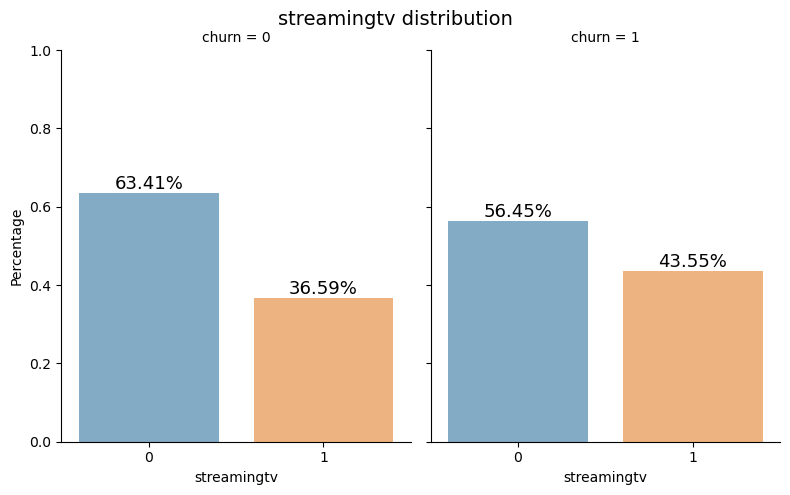

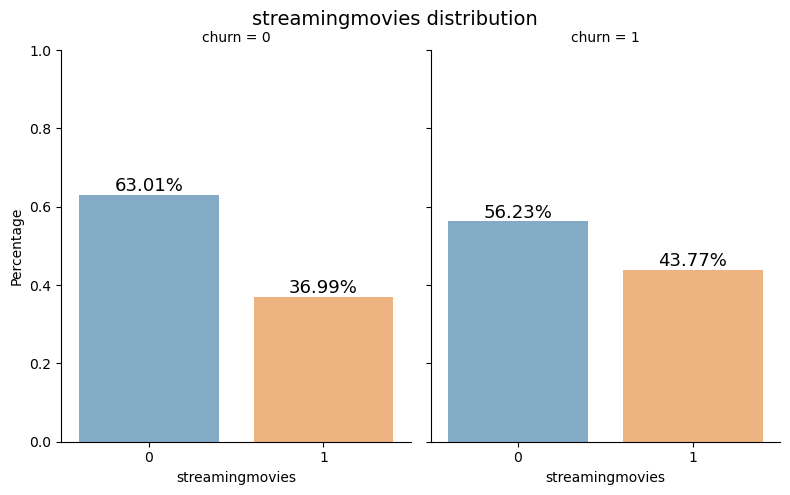

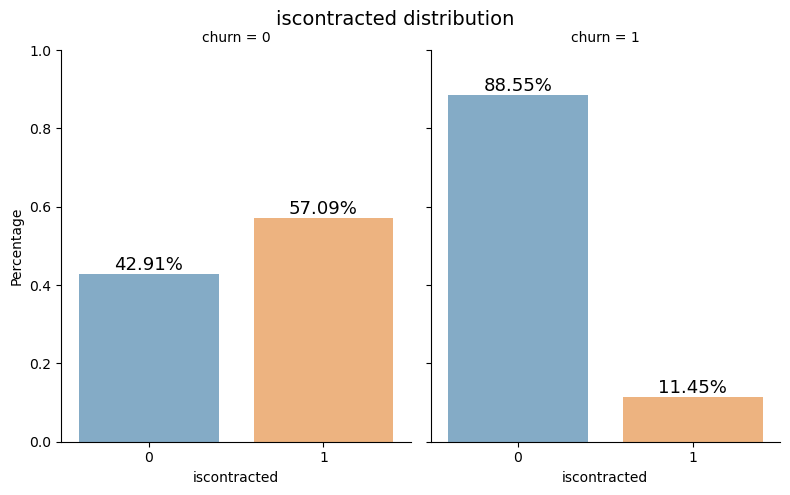

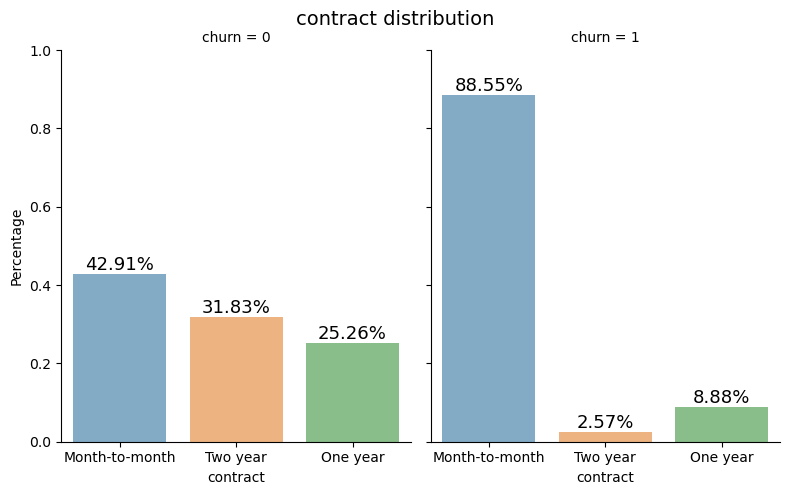

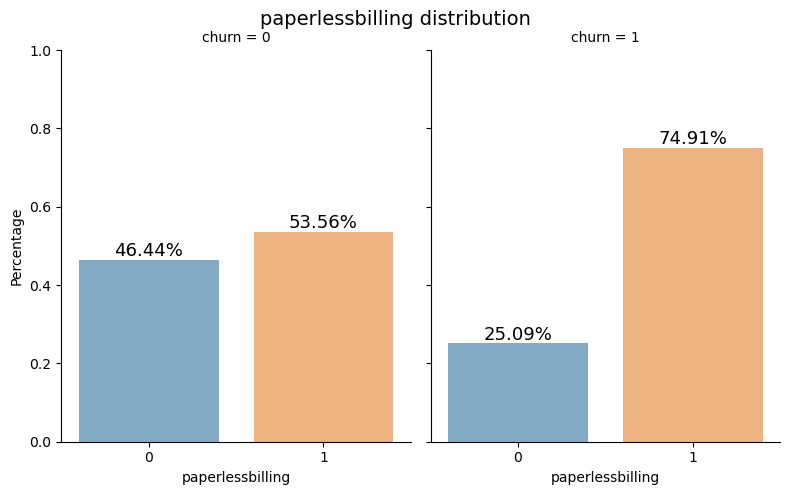

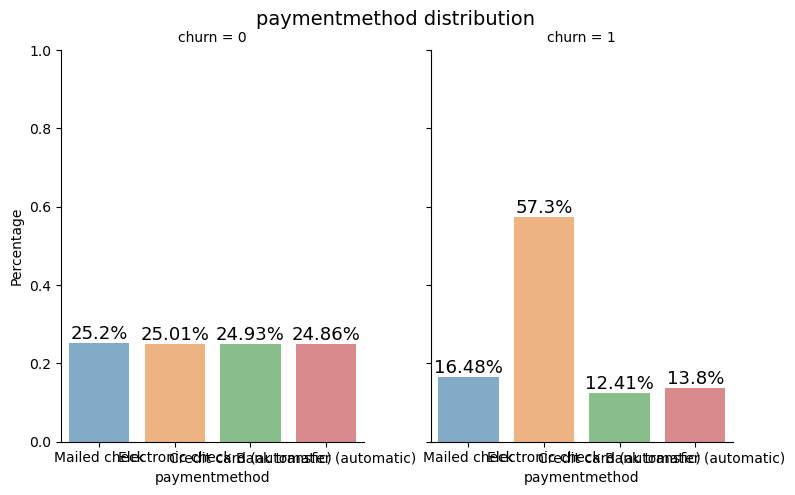

In [26]:
churn_summary = df_cal.groupby('churn')
Categorical_var_churn_dist(churn_summary, cat_cols,'churn')

From above analysis, churn customers are likely to

- not have partners and Dependents; Means likely to be Single.
- have Internet service and specifically Fiber optics
- not have online security service, online backup service, device protection service, Tech support service
- have streaming TV and streaming Movies services
- be with monthly based contract
- have paperless billing service
- have electronic check payment method

#### Distribution of Tenure, Monthly Charges and Total Charges

In [27]:
# Mean summary of customers (Churn vs Non churn)
print(churn_summary['tenure','monthlycharges','totalcharges'].mean())

          tenure  monthlycharges  totalcharges
churn                                         
0      37.569965       61.265124   2549.911442
1      17.979133       74.441332   1531.796094


Result shows that Churn customers have more Monthly charges compared to existing customers.
Also, there is a drastic difference in Tenure and Total Charges for Churn vs existing customers.

Let's check distribution of each features with target variable.

##### Tenure vs Churn Distribution

In [28]:
def Numerical_distribution(df_cal,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(2,1,1)
    ax = sns.kdeplot(df_cal[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Original " +feature + " Distribution"
    plt.title(title_str)
        
    plt.subplot(2,1,2)
    ax = sns.kdeplot(df_cal.loc[(df_cal['churn']==1),feature]
                     , color = 'g'
                     , shade = True
                     , label='Churn')

    ax = sns.kdeplot(df_cal.loc[(df_cal['churn']==0) ,feature]
                     , color = 'b'
                     , shade = True
                     , label='No churn')
    
    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.legend()
    plt.show()

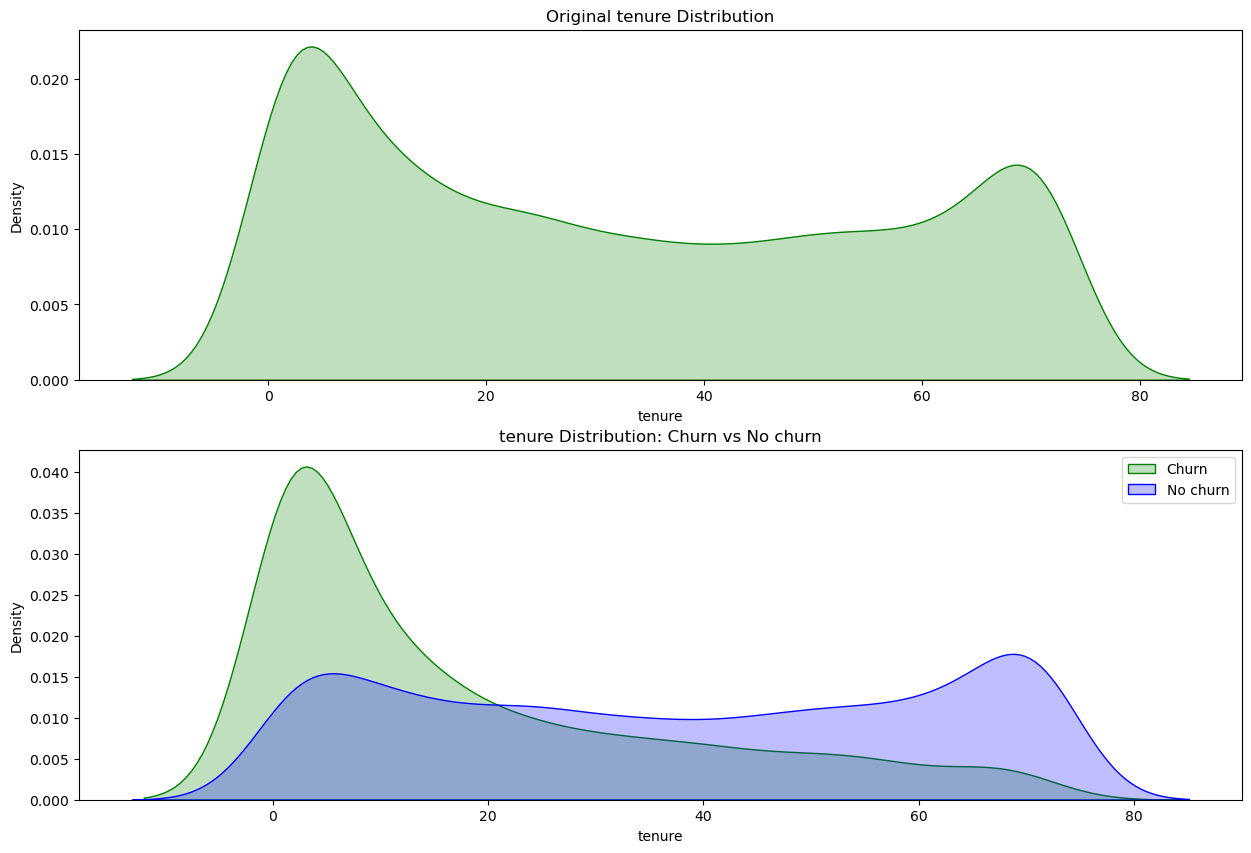

In [29]:
Numerical_distribution(df_cal,'tenure')

##### MonthlyCharges vs Churn Distribution

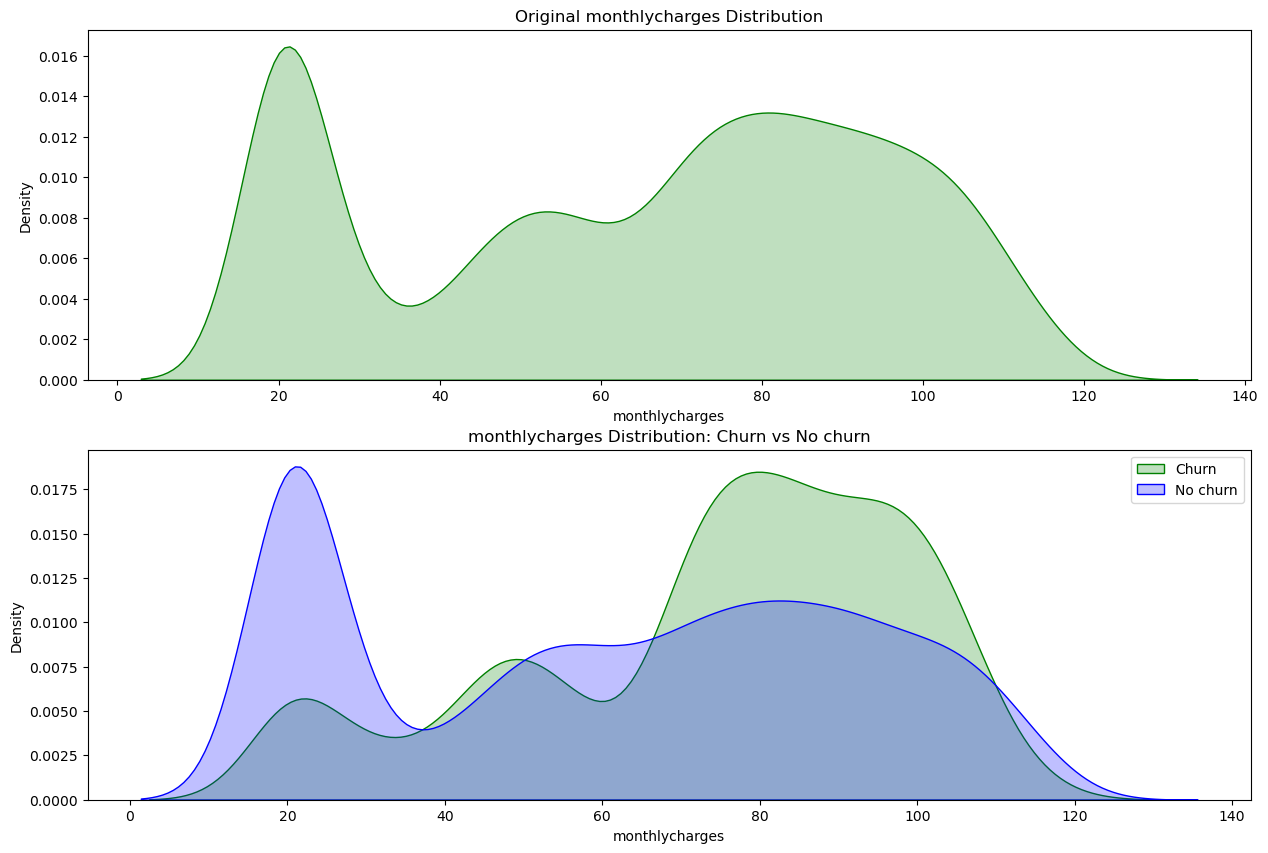

In [30]:
Numerical_distribution(df_cal,'monthlycharges')

##### TotalCharges vs Churn Distribution

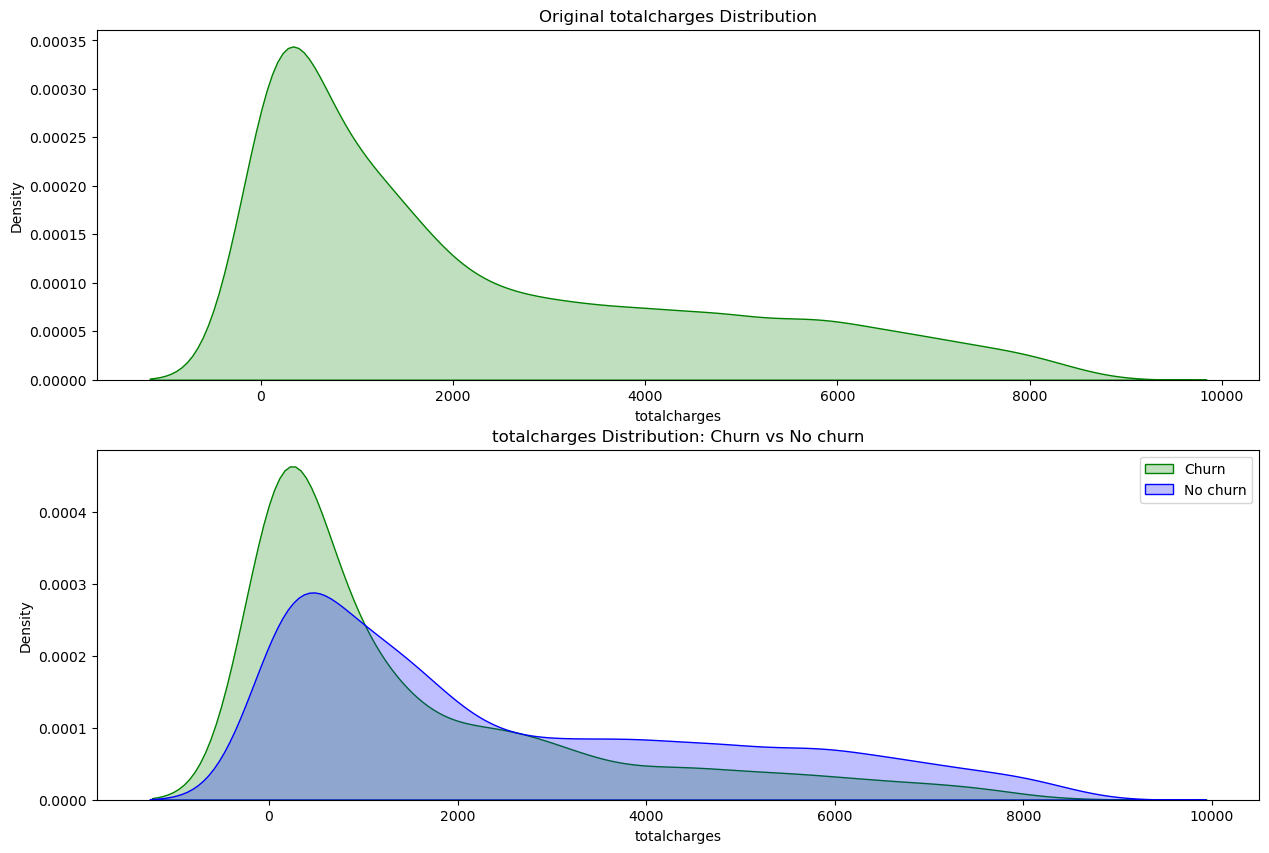

In [31]:
Numerical_distribution(df_cal,'totalcharges')

From above distribution, churn subscribers are

- more likely to leave company who's tenure is less than a year
- more likely to have more than $65 monthly charges

### Cluster Analysis

Let's check is there any relationship between Tenure and MonthlyCharges.

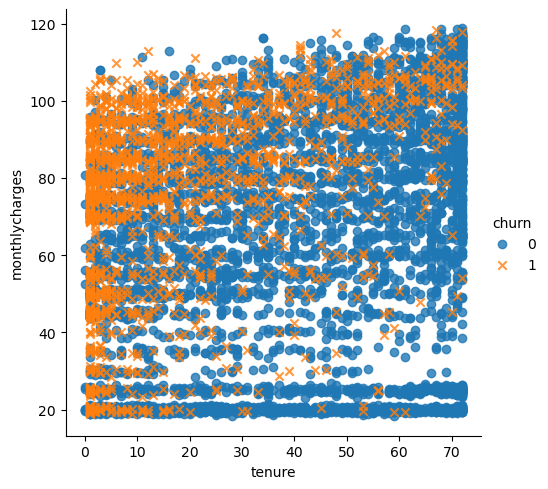

In [32]:
sns.lmplot(x='tenure'
           ,y='monthlycharges'
           ,data=df_cal
           ,hue='churn'
            ,fit_reg=False
            ,markers=["o", "x"])
plt.show()

**From the analysis, there are some clusters based on Tenure and Monthly Charges.**

Let's apply K-means cluster algorithm to see clusters. Before passing data to K-means algo, need to normalize Tenure and Monthly Charges.

In [33]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [34]:
# normalized tenure and monthlycharges

df_cal['tenure_norm'] = Normalize_feature(df_cal[['tenure']])
df_cal['monthlycharges_norm'] = Normalize_feature(df_cal[['monthlycharges']])
df_cal.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,iscontracted,tenure_norm,monthlycharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,-1.277445,-1.160323
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0.066327,-0.259629
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,0,-1.236724,-0.362660
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0.514251,-0.746535
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,-1.236724,0.197365


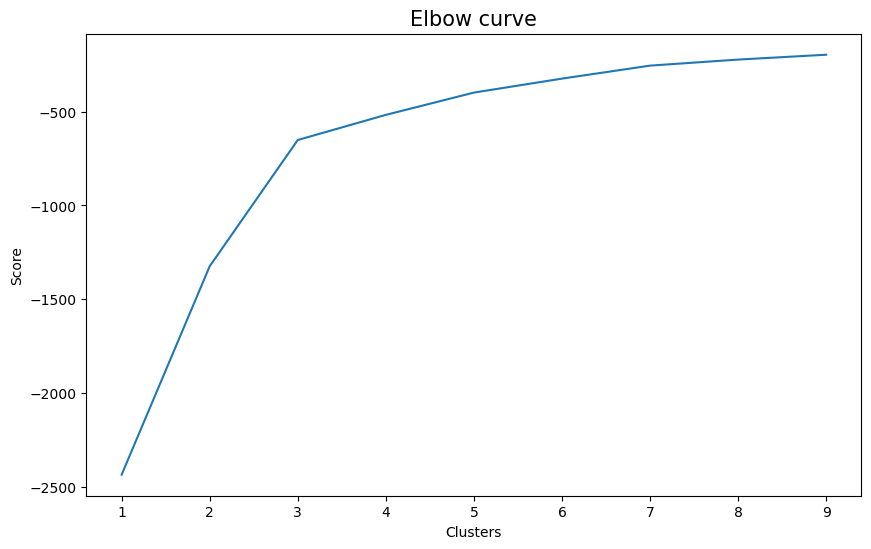

In [35]:
from sklearn.cluster import KMeans

def Create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data

    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]

    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()
    
# checking number of clusters

Create_elbow_curve(df_cal[df_cal.churn==1][['tenure_norm','monthlycharges_norm']])    

From Elbow curve, 3 seems most efficient.

In [36]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = 42 # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plt.cm.jet(i/n_clusters) for i in kmeans.labels_]


    fig = plt.figure(figsize=(7,5))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.churn==1][[x_title+'_norm', y_title +'_norm']])

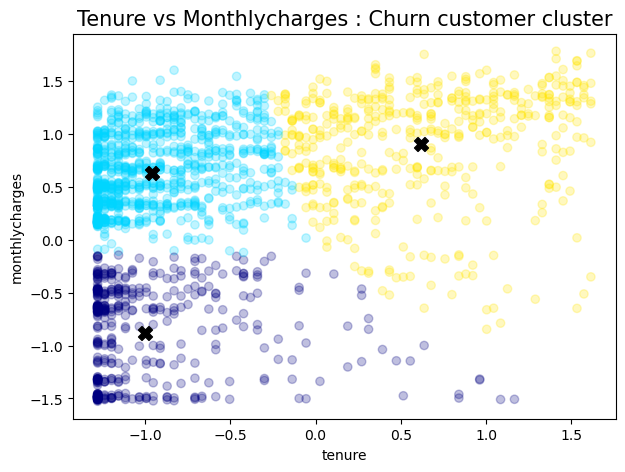

array([-1,  0,  1,  2], dtype=int64)

In [37]:
df_cal['cluster'] = -1 # by default set Cluster to -1
df_cal.loc[(df_cal.churn==1),'cluster'] = Create_kmeans_cluster_graph(df_cal
                            ,df_cal[df_cal.churn==1][['tenure_norm','monthlycharges_norm']]
                            ,3
                           ,'tenure'
                           ,'monthlycharges'
                           ,"Tenure vs Monthlycharges : Churn customer cluster")

df_cal['cluster'].unique()

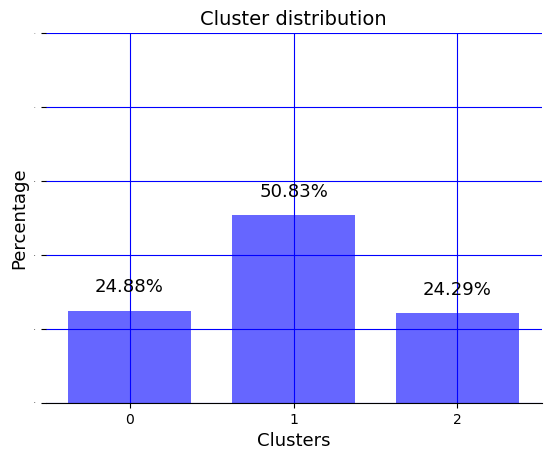

In [38]:
# Distribution of clusters
churn_distribution =  df_cal[df_cal['churn']==1].cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= churn_distribution.index
                   , y = churn_distribution.values
                   , x_title = 'Clusters'
                   , y_title = 'Percentage'
                   , chart_title = 'Cluster distribution')

Based on K-means cluster graph, we can see that there are three groups.
1. Low Tenure and High Monthly Charges (Green cluster)
2. High Tenure and High Monthly Charges (Red cluster)
3. Low Tenure and Low Monthly Charges (Blue cluster)

And From distribution graph shows that around 50% of the customers belong to cluster Low Tenure and High Monthly Charges.

Let's check there average Tenure and Monthly Charges by cluster.

In [39]:
df_cluster_gp = df_cal[df_cal['churn']==1].groupby('cluster')
print(df_cluster_gp['tenure','monthlycharges'].mean())

            tenure  monthlycharges
cluster                           
0         7.808602       38.329140
1         8.805263       83.795000
2        47.592511       91.855837


#### Data Preprocessing

In [40]:
df_model = Data_transformation_renaming(df)
df_model.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,iscontracted
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0


In [69]:
df.drop('customerID', axis=1,inplace=True)

In [71]:
X = df.drop('Churn', axis=1)
y= df['Churn']

In [72]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=32)

In [44]:
'''LB = LabelEncoder()
X_train = X_train.apply(LB.fit_transform)
X_test = X_test.apply(LB.fit_transform)
'''

In [45]:
X_train

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,iscontracted
1698,1,0,1,1,71,1,1,1,0,1,0,1,0,0,2,1,2,937,4764,1
6565,1,0,1,0,61,1,1,1,1,1,0,0,1,1,0,1,2,1328,4826,0
2743,1,0,1,0,67,1,0,1,1,1,1,1,1,1,2,1,2,1413,5089,1
2984,0,0,1,0,26,1,1,0,0,0,0,0,0,0,1,0,3,110,1559,1
4525,1,0,0,0,32,1,0,1,1,1,1,0,0,1,0,1,1,1093,3512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0,0,0,1,5,1,0,1,0,0,0,1,0,0,0,1,3,368,896,0
2940,1,1,0,0,53,0,0,1,0,1,1,0,1,1,0,1,2,418,3458,0
1334,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,94,58,0
1579,1,1,1,0,12,1,0,1,0,0,0,0,0,1,0,1,2,857,1920,0


In [77]:
categorical_indices_numeric = [df.columns.get_loc(col) for col in df.select_dtypes(include='object').columns]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices_numeric[:-1])
    ]
)

pipelines = {
    'knn': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('Estimator',KNeighborsClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('Estimator', MultinomialNB())
    ]),
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('Estimator', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('Estimator', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('Estimator', DecisionTreeClassifier())
    ])
}

param_grids = {
    'random_forest': [{
        'feature_selection__k': [5, 10, 15],
        'Estimator__n_estimators': [50, 100, 200]
    }],
    'decision_tree': [{
        'feature_selection__k': [5, 10, 15],
        'Estimator__max_depth': [None, 10, 20]
    }],
    'logistic_regression': [{
        'feature_selection__k': [5, 10, 15],
        'Estimator__C': [0.1, 1, 10],
        'Estimator__penalty': ['l1', 'l2']
    }],
    'knn': [{
        'feature_selection__k': [5, 10, 15], 
        'Estimator__n_neighbors': [3, 5, 7, 9],
        'Estimator__p':[1,2,3]
    }],
    'naive_bayes': [{
        'feature_selection__k': [5, 10, 15],
        'Estimator__alpha':[1,2,3]
    }]
}

In [78]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    

    %time grid_search.fit(X_train, y_train)
    
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))

    best_models[algo] = grid_search.best_estimator_
    print()

********** knn **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: total: 7min 12s
Wall time: 1min 19s
Train Score:  0.7758258852231912
Test Score:  0.7771469127040455

********** naive_bayes **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 3.94 s
Wall time: 5.43 s
Train Score:  0.7415690440204192
Test Score:  0.7068843151171044

********** logistic_regression **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 5.42 s
Wall time: 7.76 s
Train Score:  0.7852313865541583
Test Score:  0.7792760823278921

********** random_forest **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 29 s
Wall time: 40.8 s
Train Score:  0.7843440751078408
Test Score:  0.7835344215755855

********** decision_tree **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 3.72 s
Wall time: 5.29 s
Train Score:  0.7843440751078408
Test Scor

In [79]:
import pickle
pickle.dump(pipelines['random_forest'].fit(X_train,y_train),open("customer_churn_model.pkl","wb"))
predict = pickle.load(open("customer_churn_model.pkl","rb"))